In [1]:
import numpy as np
import pandas as pd

In [2]:
df_clients = pd.read_csv('datasets/D_clients.csv')
df_close_loan = pd.read_csv('datasets/D_close_loan.csv')
df_job = pd.read_csv('datasets/D_job.csv')
df_last_credit = pd.read_csv('datasets/D_last_credit.csv')
df_loan = pd.read_csv('datasets/D_loan.csv')
df_pens = pd.read_csv('datasets/D_pens.csv')
df_salary = pd.read_csv('datasets/D_salary.csv')
df_target = pd.read_csv('datasets/D_target.csv')
df_work = pd.read_csv('datasets/D_work.csv')

#### Проанализируем содержимое таблиц

1. Таблица `D_clients` содержит столбцы `SOCSTATUS_WORK_FL` и `SOCSTATUS_PENS_FL`, описание которых противоречит информации из таблиц `D_work` и `D_pens`. Всвязи с этим, будем использовать информацию из описания столбцов в ноутбуке `BD_homework`, тогда таблицы `D_work` и `D_pens` нам не нужны.

In [3]:
df_work

,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


In [4]:
df_pens

,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


In [5]:
df_clients.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0


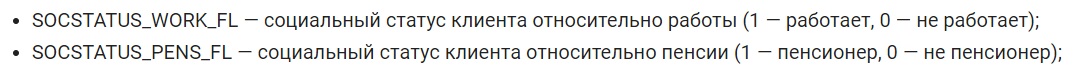

2. Заметим, что столбцы `REG_ADDRESS_PROVINCE`, `FACT_ADDRESS_PROVINCE` и `POSTAL_ADDRESS_PROVINCE` совпадают друг с другом за исключением 150-200 строк, однако не будем заменять эти три столбца каким-нибудь одним из них, потому что несовпадающая информация разумна и может быть важной.

In [6]:
(df_clients['REG_ADDRESS_PROVINCE'] == df_clients['FACT_ADDRESS_PROVINCE']).sum()

15801

In [7]:
(df_clients['REG_ADDRESS_PROVINCE'] == df_clients['POSTAL_ADDRESS_PROVINCE']).sum()

15844

In [8]:
(df_clients['FACT_ADDRESS_PROVINCE'] == df_clients['POSTAL_ADDRESS_PROVINCE']).sum()

15955

3. В таблице `D_job` есть много строчек, полностью состоящих из `NaN`.

In [9]:
df_job.isna().sum()

GEN_INDUSTRY    1367
GEN_TITLE       1367
JOB_DIR         1367
WORK_TIME       1368
ID_CLIENT          0
dtype: int64

Удалим их: 

In [10]:
df_job.dropna(inplace=True)
df_job = df_job.reset_index().drop('index', axis=1)
df_job.isna().sum()

GEN_INDUSTRY    0
GEN_TITLE       0
JOB_DIR         0
WORK_TIME       0
ID_CLIENT       0
dtype: int64

4. Преобразуем к `int` некоторые целочисленные характеристики, имеющие тип `float`.

In [11]:
df_job['WORK_TIME'] = df_job['WORK_TIME'].astype(np.int64)
df_salary['PERSONAL_INCOME'] = df_salary['PERSONAL_INCOME'].astype(np.int64)
df_last_credit['CREDIT'] = df_last_credit['CREDIT'].astype(np.int64)
df_last_credit['FST_PAYMENT'] = df_last_credit['FST_PAYMENT'].astype(np.int64)

5. В таблице `D_clients` есть много дубликатов (без `ID`).

In [12]:
df_clients.duplicated(subset=df_clients.columns.drop('ID'), keep=False).sum()

2733

Удалим их: 

In [13]:
df_clients.drop_duplicates(subset=df_clients.columns.drop('ID'), keep='first', inplace=True);

In [14]:
df_clients.shape

(14570, 14)

#### Соберём все таблицы в одну

In [15]:
df_merge = df_clients.merge(df_job, how='left', left_on='ID', right_on='ID_CLIENT').drop('ID_CLIENT', axis=1)
df_merge = df_merge.merge(df_salary, how='left', left_on='ID', right_on='ID_CLIENT').drop('ID_CLIENT', axis=1)
df_merge = df_merge.merge(df_last_credit, how='left', left_on='ID', right_on='ID_CLIENT').drop('ID_CLIENT', axis=1)
df_merge = df_merge.merge(df_loan, how='left', left_on='ID', right_on='ID_CLIENT').drop('ID_CLIENT', axis=1)
df_merge = df_merge.merge(df_close_loan, how='left', left_on='ID_LOAN', right_on='ID_LOAN').drop('ID_LOAN', axis=1)
df_merge = df_merge.merge(df_target, how='left', left_on='ID', right_on='ID_CLIENT').drop('ID_CLIENT', axis=1)

df_merge = df_merge.drop_duplicates(subset='ID').reset_index().drop('index', axis=1)

Посмотрим на пропуски:

In [16]:
df_merge.isna().sum()

ID                            0
AGE                           0
GENDER                        0
EDUCATION                     0
MARITAL_STATUS                0
CHILD_TOTAL                   0
DEPENDANTS                    0
SOCSTATUS_WORK_FL             0
SOCSTATUS_PENS_FL             0
REG_ADDRESS_PROVINCE          0
FACT_ADDRESS_PROVINCE         0
POSTAL_ADDRESS_PROVINCE       0
FL_PRESENCE_FL                0
OWN_AUTO                      0
GEN_INDUSTRY               1715
GEN_TITLE                  1715
JOB_DIR                    1715
WORK_TIME                  1715
FAMILY_INCOME               400
PERSONAL_INCOME             400
CREDIT                      400
TERM                        400
FST_PAYMENT                 400
CLOSED_FL                   400
AGREEMENT_RK                400
TARGET                      400
dtype: int64

Заполним их наиболее часто встречающимися значениями:

In [17]:
from sklearn import impute

miss_columns = ['GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'FAMILY_INCOME', 'WORK_TIME', 'PERSONAL_INCOME', 'CREDIT', 'TERM', 'FST_PAYMENT', 'CLOSED_FL', 'AGREEMENT_RK', 'TARGET']
miss_replacer = impute.SimpleImputer(strategy='most_frequent')

df_merge_miss = df_merge[miss_columns]
df_merge[miss_columns] = pd.DataFrame(data=miss_replacer.fit_transform(df_merge_miss), columns=df_merge_miss.columns)

In [18]:
df_merge.isna().sum()

ID                         0
AGE                        0
GENDER                     0
EDUCATION                  0
MARITAL_STATUS             0
CHILD_TOTAL                0
DEPENDANTS                 0
SOCSTATUS_WORK_FL          0
SOCSTATUS_PENS_FL          0
REG_ADDRESS_PROVINCE       0
FACT_ADDRESS_PROVINCE      0
POSTAL_ADDRESS_PROVINCE    0
FL_PRESENCE_FL             0
OWN_AUTO                   0
GEN_INDUSTRY               0
GEN_TITLE                  0
JOB_DIR                    0
WORK_TIME                  0
FAMILY_INCOME              0
PERSONAL_INCOME            0
CREDIT                     0
TERM                       0
FST_PAYMENT                0
CLOSED_FL                  0
AGREEMENT_RK               0
TARGET                     0
dtype: int64

Заметим, что некоторые столбцы привелись к типу `float`, вернём их обратно к нужным типам:

In [19]:
df_merge[['WORK_TIME', 'PERSONAL_INCOME', 'CREDIT', 'TERM', 'FST_PAYMENT', 'CLOSED_FL', 'AGREEMENT_RK', 'TARGET']] = df_merge[['WORK_TIME', 'PERSONAL_INCOME', 'CREDIT', 'TERM', 'FST_PAYMENT', 'CLOSED_FL', 'AGREEMENT_RK', 'TARGET']].astype(np.int64)

In [20]:
df_merge.head()

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,CLOSED_FL,AGREEMENT_RK,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,Участие в основ. деятельности,3,от 20000 до 50000 руб.,25000,5588,6,1000,0,60099204,1
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,Участие в основ. деятельности,5,от 10000 до 20000 руб.,10000,19498,12,0,0,62244665,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,Участие в основ. деятельности,360,от 20000 до 50000 руб.,30000,15470,3,15000,1,61050759,0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,Участие в основ. деятельности,3,от 20000 до 50000 руб.,25000,13960,6,2500,0,62079659,0
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,Участие в основ. деятельности,12,от 10000 до 20000 руб.,15000,11890,6,8000,1,66583553,0


Выгрузим итоговую таблицу в `csv` файл:

In [21]:
df_merge.to_csv('datasets/D_merge.csv')